In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
air = pd.read_csv("penghasilan-per-keluarga2.csv")
air.head()

,JA,P
0,4,5
1,4,8
2,4,3
3,4,1
4,1,3


In [19]:
# air = air.drop(["Date","Time","CO","PT08.S1","C6H6","PT08.S2","AH","T","PT08.S5","PT08.S4","NO2","PT08.S3","NOx"], axis = 1)
air = air.drop(["Date","Time","PT08.S1","C6H6","PT08.S2","AH","T","PT08.S5","PT08.S4","PT08.S3","NOx"], axis = 1)
air

,CO,NMHC,NO2,RH
0,2.6,150,113,48.9
1,2.0,112,92,47.7
2,2.2,88,114,54.0
3,2.2,80,122,60.0
4,1.6,51,116,59.6
...,...,...,...,...
9352,3.1,-200,190,29.3
9353,2.4,-200,179,23.7
9354,2.4,-200,175,18.3
9355,2.1,-200,156,13.5


In [6]:
air.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   JA      16 non-null     int64
 1   P       16 non-null     int64
dtypes: int64(2)
memory usage: 384.0 bytes


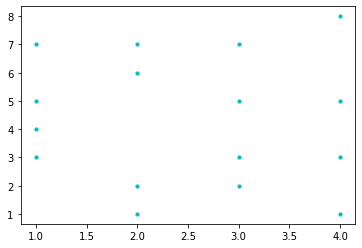

In [7]:
plt.scatter(air.JA, air.P, s =10, c = "c", marker = "o", alpha = 1)
# plt.scatter(air.CO, air.NMHC , air.NO2, air.RH, marker = "o", alpha = 1)
plt.show()

In [8]:
air_x = air.iloc[:, 0:2]
# air_x = air.iloc[:, 0:4]
air_x.head()

,JA,P
0,4,5
1,4,8
2,4,3
3,4,1
4,1,3


In [9]:
x_array = np.array(air_x)
print(x_array)

[[4 5]
 [4 8]
 [4 3]
 [4 1]
 [1 3]
 [1 4]
 [1 7]
 [1 5]
 [2 6]
 [2 2]
 [2 1]
 [2 7]
 [3 3]
 [3 5]
 [3 7]
 [3 2]]


In [10]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[1.        , 0.57142857],
       [1.        , 1.        ],
       [1.        , 0.28571429],
       [1.        , 0.        ],
       [0.        , 0.28571429],
       [0.        , 0.42857143],
       [0.        , 0.85714286],
       [0.        , 0.57142857],
       [0.33333333, 0.71428571],
       [0.33333333, 0.14285714],
       [0.33333333, 0.        ],
       [0.33333333, 0.85714286],
       [0.66666667, 0.28571429],
       [0.66666667, 0.57142857],
       [0.66666667, 0.85714286],
       [0.66666667, 0.14285714]])

In [16]:
kmeans = KMeans(n_clusters = 3, random_state=42)

In [17]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [18]:
print(kmeans.cluster_centers_)

[[0.11111111 0.61904762]
 [0.66666667 0.14285714]
 [0.83333333 0.75      ]]


In [19]:
air["kluster"] = kmeans.labels_

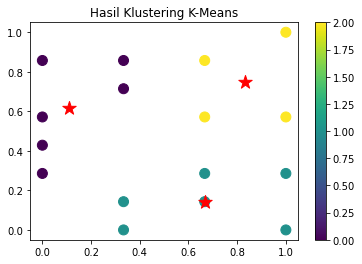

In [21]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = air.kluster, marker = "o", alpha = 1, )
# output = plt.scatter(x_scaled[:,0], x_scaled[:,1], x_scaled[:,2], x_scaled[:,3],  marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="*");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()